## Import Data

In [4]:
import json
import os, glob
import pandas as pd
import pandas.io.json as pdjson
import seaborn as sns
import urllib.request

In [5]:
def results_url(**kwargs):
    return "http://{host}/artifacts/{environment}/{repo_branch_name}/{commitid}/{variant}/{timestamp}/{timestamp}_{ocaml_version}.bench".format(**kwargs)

def load_bench_results(**kwargs):
    url = results_url(**kwargs)
    with urllib.request.urlopen(url) as f:
        xs = [json.loads(l) for l in f.read().decode().splitlines()]
        df = pdjson.json_normalize(xs)
    return df

commit_a = {
    'host': 'bench2.ocamllabs.io:8083',
    'environment': 'bench2.ocamllabs.io',
    'repo_branch_name': 'ocaml_trunk__trunk',
    'commitid': '4ecd0e477677c4a16cc0f964d6fb85eb48fb1ff0',
    'variant': 'vanilla',
    'timestamp': '20191019_060219',
    'ocaml_version': '4.10.0',
    }

commit_b = {
    'host': 'bench2.ocamllabs.io:8083',
    'environment': 'bench2.ocamllabs.io',
    'repo_branch_name': 'closure_rep3__closure_rep3',
    'commitid': '7fd87287430596fbeb17e9cf74c8e5d5688112b6',
    'variant': 'vanilla',
    'timestamp': '20190928_025446',
    'ocaml_version': '4.10.0',
    }

def load_commit(conf):
    df = load_bench_results(**conf)
    df['commitid'] = conf['commitid'][0:8]
    return df
    

df = pd.concat([load_commit(commit_a), load_commit(commit_b)])
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386 entries, 0 to 192
Data columns (total 25 columns):
name                               386 non-null object
command                            386 non-null object
time_secs                          386 non-null float64
user_time_secs                     386 non-null float64
sys_time_secs                      386 non-null float64
maxrss_kB                          386 non-null int64
ocaml_url                          386 non-null object
ocaml.version                      386 non-null object
ocaml.c_compiler                   386 non-null object
ocaml.architecture                 386 non-null object
ocaml.word_size                    386 non-null object
ocaml.system                       386 non-null object
ocaml.function_sections            386 non-null object
ocaml.supports_shared_libraries    386 non-null object
gc.allocated_words                 386 non-null int64
gc.minor_words                     386 non-null int64
gc.promoted_wor

,time_secs,user_time_secs,sys_time_secs,maxrss_kB,gc.allocated_words,gc.minor_words,gc.promoted_words,gc.major_words,gc.minor_collections,gc.major_collections,gc.heap_words,gc.heap_chunks,gc.top_heap_words,gc.compactions
count,386.000000,386.000000,386.000000,386.000000,3.860000e+02,3.860000e+02,3.860000e+02,3.860000e+02,386.000000,386.000000,3.860000e+02,386.000000,3.860000e+02,386.000000
mean,2.503011,2.455272,0.047080,27002.113990,2.785815e+08,2.679192e+08,1.244271e+07,2.310496e+07,1076.598446,84.689119,3.094364e+06,4.194301,3.316968e+06,7.670984
std,7.535295,7.466775,0.364199,78578.808961,1.008237e+09,1.000231e+09,4.455010e+07,9.499959e+07,3851.568193,349.478858,9.718476e+06,6.752475,1.015971e+07,50.969388
min,0.001129,0.000000,0.000000,2480.000000,8.700000e+01,8.700000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,7.372800e+04,1.000000,4.915200e+05,0.000000
25%,0.381861,0.375533,0.000000,4528.000000,9.818020e+05,9.818020e+05,7.500000e+01,7.800000e+01,4.000000,0.000000,4.915200e+05,1.000000,4.915200e+05,0.000000
50%,0.975114,0.970249,0.000000,5326.000000,5.000010e+07,4.590009e+07,1.372500e+03,4.006850e+04,196.000000,2.000000,4.915200e+05,1.000000,4.915200e+05,0.000000
75%,1.968765,1.950511,0.007938,10213.000000,9.003913e+07,8.765451e+07,3.575816e+06,7.999584e+06,369.000000,37.000000,5.652480e+05,3.000000,6.228480e+05,2.000000
max,92.215903,91.718258,4.750759,728548.000000,9.746759e+09,9.746743e+09,4.356128e+08,1.039655e+09,37210.000000,3562.000000,9.152973e+07,38.000000,9.152973e+07,562.000000


In [6]:
df.head().T

,0,1,2,3,4
name,js-of-ocaml,zarith_fib.40,zarith_fact.40.1000000,zarith_tak.2500,zarith_pi.5000
command,js_of_ocaml '--disable=check-magic-number' -,zarith_fib.exe Z 40,zarith_fact.exe 40 1_000_000,zarith_tak.exe Z 2500,zarith_pi.exe 5000
time_secs,19.3905,1.31467,1.41166,1.63564,0.606247
user_time_secs,19.0931,1.31033,1.41123,1.63528,0.589672
sys_time_secs,0.291955,0.003994,0,0,0.016155
maxrss_kB,461220,3432,5368,3436,20388
ocaml_url,https://github.com/ocaml/ocaml/archive/4ecd0e4...,https://github.com/ocaml/ocaml/archive/4ecd0e4...,https://github.com/ocaml/ocaml/archive/4ecd0e4...,https://github.com/ocaml/ocaml/archive/4ecd0e4...,https://github.com/ocaml/ocaml/archive/4ecd0e4...
ocaml.version,4.10.0+dev1-2019-10-18,4.10.0+dev1-2019-10-18,4.10.0+dev1-2019-10-18,4.10.0+dev1-2019-10-18,4.10.0+dev1-2019-10-18
ocaml.c_compiler,gcc,gcc,gcc,gcc,gcc
ocaml.architecture,amd64,amd64,amd64,amd64,amd64


## Table based comparison

In [7]:
def calc_compare_table(df, topic):
    tmp = pd.pivot_table(df, values=topic, index='name', columns='commitid')
    tmp = tmp.reset_index().rename_axis(None, axis=1)
    id1 = df.commitid.unique()[0] 
    id2 = df.commitid.unique()[1]
    tmp = tmp[['name', id1, id2]]
    tmp['diff'] = tmp[id2] - tmp[id1]
    tmp['pct_diff'] = 100.*tmp['diff']/tmp[id1]
    return tmp
    
    
def display_compare_table(df, N=4):
    print('Top %d percentage increases'%N)
    display(df.sort_values('pct_diff', ascending=False).head(N))

    print('Top %d percentage decreases'%N)
    display(df.sort_values('pct_diff', ascending=True).head(N))


In [8]:
tmp = calc_compare_table(df, 'time_secs')
display_compare_table(tmp)

Top 4 percentage increases


,name,4ecd0e47,7fd87287,diff,pct_diff
133,str_bench.str_regexp.1000000,0.921993,1.328353,0.406360,44.074103
9,big_array_bench.big_array_int_rev.1024.50000,1.336484,1.586667,0.250183,18.719499
92,map_bench.map_fold.10000,0.919707,1.021700,0.101993,11.089739
165,string_bench.string_uppercase_ascii.1000000,2.183579,2.382656,0.199077,9.117000


Top 4 percentage decreases


,name,4ecd0e47,7fd87287,diff,pct_diff
163,string_bench.string_sub.1000000,0.031434,0.020818,-0.010616,-33.772489
121,sequence-cps,2.652972,1.796881,-0.856091,-32.269138
153,string_bench.string_blit.1000000,0.038703,0.027015,-0.011688,-30.199221
20,bytes_bench.bytes_sub.1000000,0.040425,0.033347,-0.007078,-17.508876


## Time

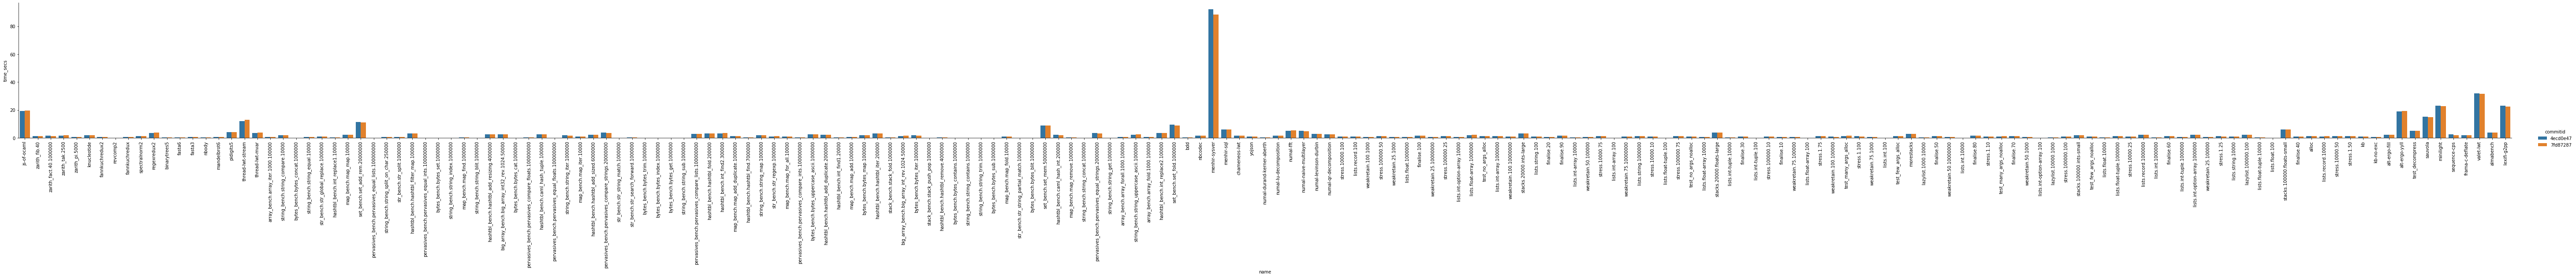

In [9]:
g = sns.catplot (x='name', y='time_secs', hue='commitid', data = df, kind ='bar', aspect=16)
g.set_xticklabels(rotation=90)

### Normalised

In [10]:
base_commitid = df.commitid.unique()[0]
print('For normalization using base_commitid: '+base_commitid)

For normalization using base_commitid: 4ecd0e47


In [11]:
def normalize(df, base_commitid, topic):
    idx = df['commitid'] == base_commitid
    normal_df = df[idx][['name', topic]].set_index('name')
    tmp = df[['name', topic, 'commitid']][~idx].set_index(['commitid','name'])
    tmp = tmp.div(normal_df)
    return tmp.rename(columns={topic:'n'+topic}).reset_index()

In [23]:
ndf = normalize(df,base_commitid,'time_secs')
ndf.sort_values(by=['ntime_secs'],inplace=True)
ndf

,commitid,name,ntime_secs
51,7fd87287,string_bench.string_sub.1000000,0.662275
188,7fd87287,sequence-cps,0.677309
35,7fd87287,string_bench.string_blit.1000000,0.698008
75,7fd87287,bytes_bench.bytes_sub.1000000,0.824911
78,7fd87287,bytes_bench.bytes_blit.1000000,0.835513
...,...,...,...
153,7fd87287,test_many_args_noalloc,1.083271
86,7fd87287,string_bench.string_uppercase_ascii.1000000,1.091170
76,7fd87287,map_bench.map_fold.10000,1.110897
68,7fd87287,big_array_bench.big_array_int_rev.1024.50000,1.187195


In [29]:
ndf['ntime_cumavg']=ndf.ntime_secs.expanding().mean()
ndf

,commitid,name,ntime_secs,ntime_cumavg
51,7fd87287,string_bench.string_sub.1000000,0.662275,0.662275
188,7fd87287,sequence-cps,0.677309,0.669792
35,7fd87287,string_bench.string_blit.1000000,0.698008,0.679197
75,7fd87287,bytes_bench.bytes_sub.1000000,0.824911,0.715626
78,7fd87287,bytes_bench.bytes_blit.1000000,0.835513,0.739603
...,...,...,...,...
153,7fd87287,test_many_args_noalloc,1.083271,0.989622
86,7fd87287,string_bench.string_uppercase_ascii.1000000,1.091170,0.990157
76,7fd87287,map_bench.map_fold.10000,1.110897,0.990789
68,7fd87287,big_array_bench.big_array_int_rev.1024.50000,1.187195,0.991812


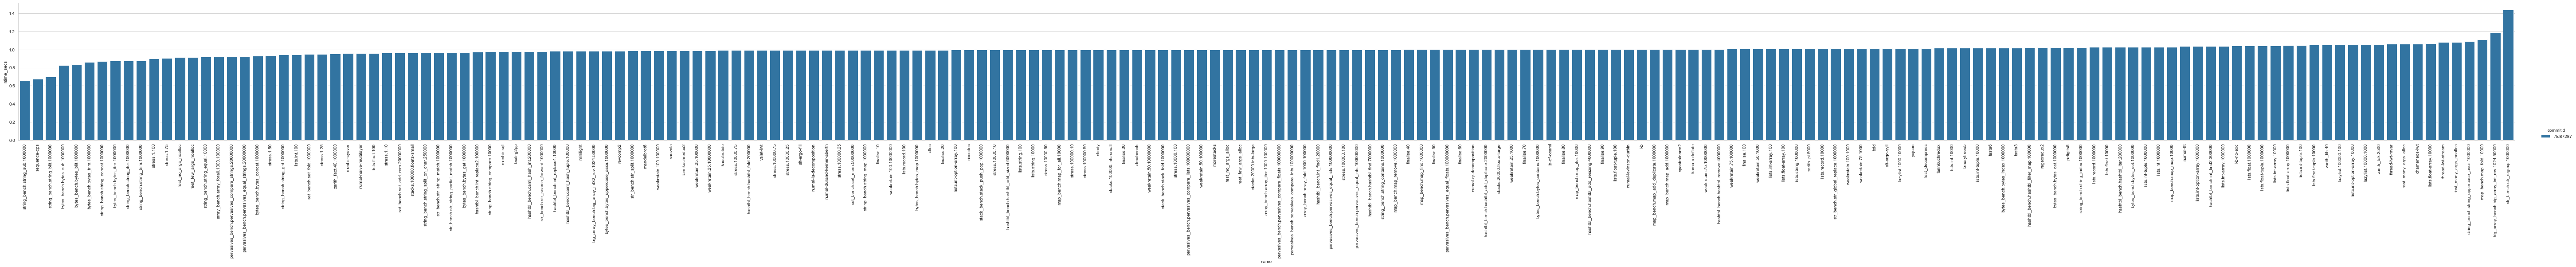

In [34]:
sns.set_style("whitegrid")
g = sns.catplot (x='name', y='ntime_secs', hue='commitid', data = ndf, kind ='bar', aspect=16, orient="v")
g.set_xticklabels(rotation=90)

Save the figure as a pdf

In [19]:
g.savefig("no_infix_tag_normalised_runtime.pdf")

## Major words

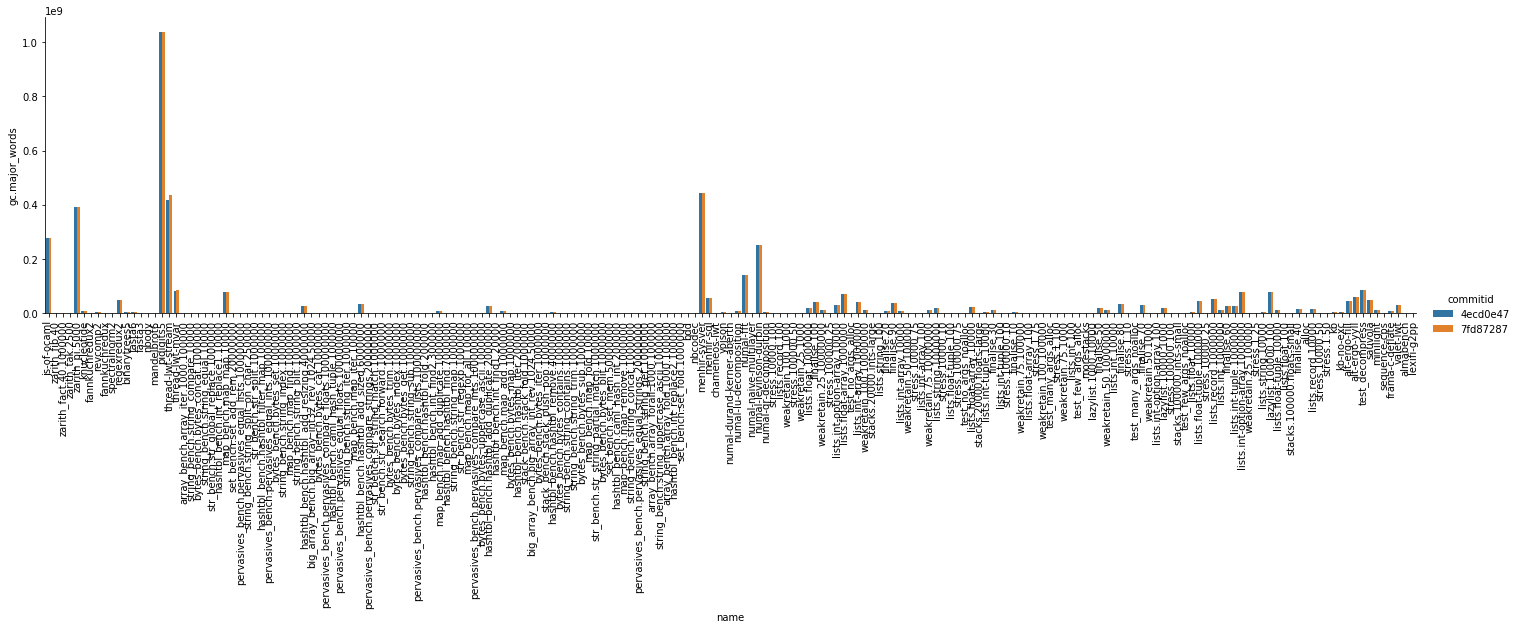

In [10]:
g = sns.catplot (x='name', y='gc.major_words', hue='commitid', data = df, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)

### Normalised

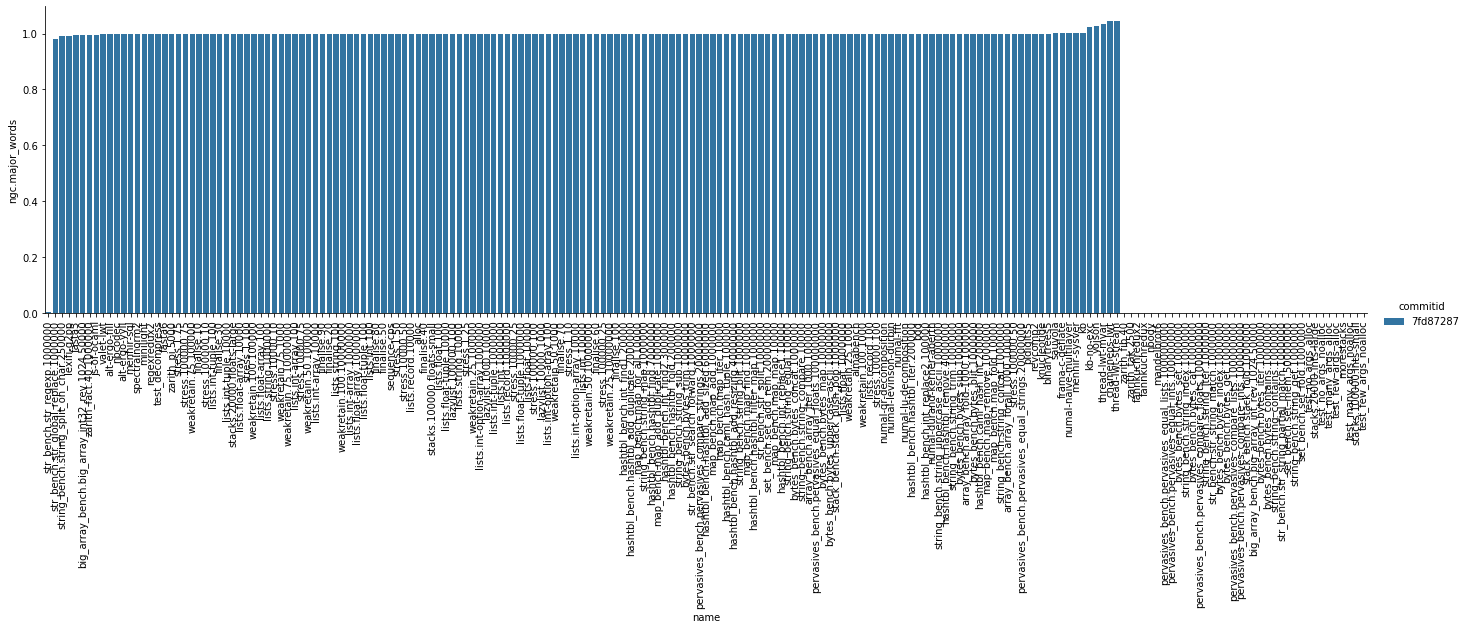

In [11]:
ndf = normalize(df,base_commitid,'gc.major_words')
ndf.sort_values(by=['ngc.major_words'],inplace=True)
g = sns.catplot (x='name', y='ngc.major_words', hue='commitid', data = ndf, kind ='bar', aspect=4)
g.set_xticklabels(rotation=90)